# Import Library and Tools

In [36]:
from random import random

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

# Load Data

In [3]:
pathfile = 'Titanic.csv'

In [4]:
df = pd.read_csv(pathfile)
print(f'total row data: {len(df)}')
df.head(7)

total row data: 891


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# Processing Data

### Drop data yang tidak diperlukan

In [7]:
df.isnull().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool

In [8]:
print(f"total jenis tiket berbeda: {len(df['Ticket'].unique())}")
print(f"total penumpang: {len(df)}")

total jenis tiket berbeda: 681
total penumpang: 891


In [9]:
df = df.drop(columns=['PassengerId', 'Name', 'Ticket'])

In [10]:
df.head(3)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S


## Data Visualization

In [14]:
for col in df.columns:
    print(f'{col} total unique data: {df[col].nunique()}')

Survived total unique data: 2
Pclass total unique data: 3
Sex total unique data: 2
Age total unique data: 88
SibSp total unique data: 7
Parch total unique data: 7
Fare total unique data: 248
Cabin total unique data: 147
Embarked total unique data: 3


### Visualisasi Untuk Persebaran Data Numerik

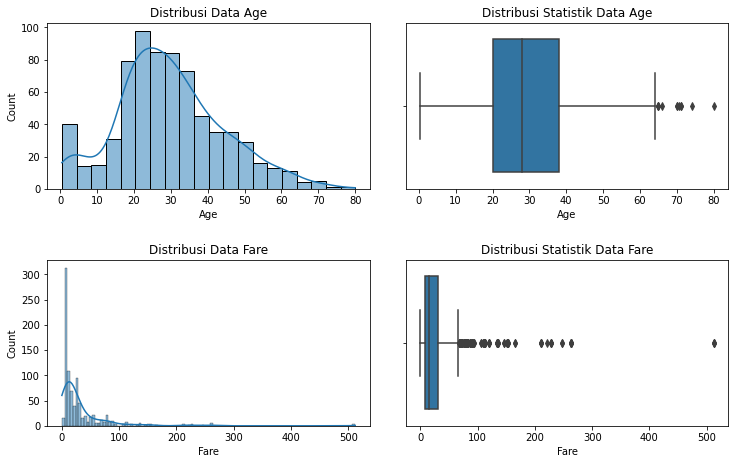

In [108]:
fig, ax = plt.subplots(2, 2, figsize=[10, 6])
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

for i, col_name in enumerate(['Age', 'Fare']):
    sns.histplot(df[col_name], ax=ax[i, 0], kde=True)
    sns.boxplot(x=df[col_name], ax=ax[i, 1])
    
    ax[i, 0].set_title(f'Distribusi Data {col_name}')
    ax[i, 1].set_title(f'Distribusi Statistik Data {col_name}')
plt.show()

### Visualisasi untuk Sebaran Categorical Data

In [13]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S


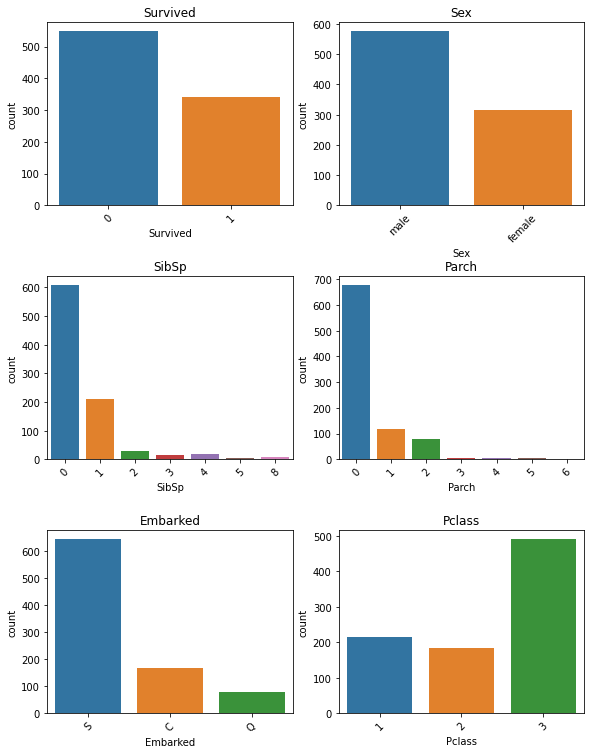

In [122]:
fig, ax = plt.subplots(3, 2, figsize=(8, 10))
plt.tight_layout(pad=0.4, w_pad=1.5, h_pad=5.0)

for index, name in enumerate(['Survived', 'Sex', 'SibSp', 'Parch', 'Embarked', 'Pclass']):
#     unique_data = df[name].value_counts()
#     color = ['#74accb', '#eb2928', '#42ba41', '#732d31', '#674d44', '#e2ecb9', '#e2de52']
    
#     unique_data.plot.bar(ax=ax[index//2, index%2], color=color)
    sns.countplot(x=df[name], ax=ax[index//2, index%2])
    ax[index//2, index%2].set_xticks(ax[index//2, index%2].get_xticks(), ax[index//2, index%2].get_xticklabels(),
                                     rotation=45)#, ha='right')
    ax[index//2, index%2].set_title(name)

plt.show()

### Visualisasi Mengenai Data Cabin

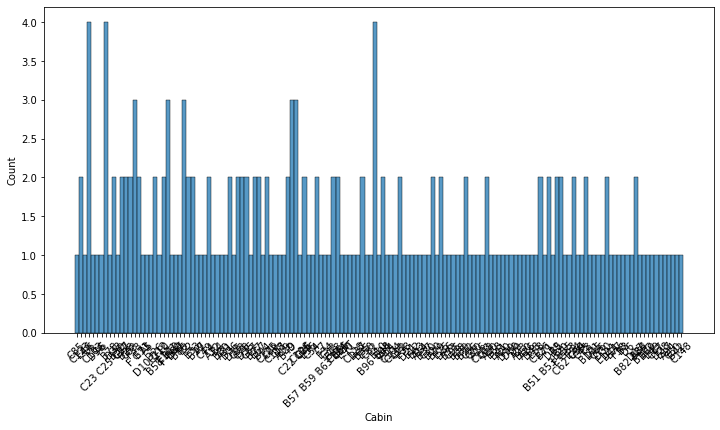

In [109]:
plt.figure(figsize=(12, 6))

sns.histplot(df['Cabin'])
plt.xticks(rotation=45)

plt.show()

In [98]:
cabin_unique = df['Cabin'].value_counts()
print(cabin_unique)
display(df[df['Cabin'] == cabin_unique.index[0]])
display(df[df['Cabin'] == cabin_unique.index[-1]])

B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: Cabin, Length: 147, dtype: int64


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
390,1,1,male,36.0,1,2,120.0,B96 B98,S
435,1,1,female,14.0,1,2,120.0,B96 B98,S
763,1,1,female,36.0,1,2,120.0,B96 B98,S
802,1,1,male,11.0,1,2,120.0,B96 B98,S


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
889,1,1,male,26.0,0,0,30.0,C148,C


### Angka Survival Berdasarkan Informasi Penumpang

In [110]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S


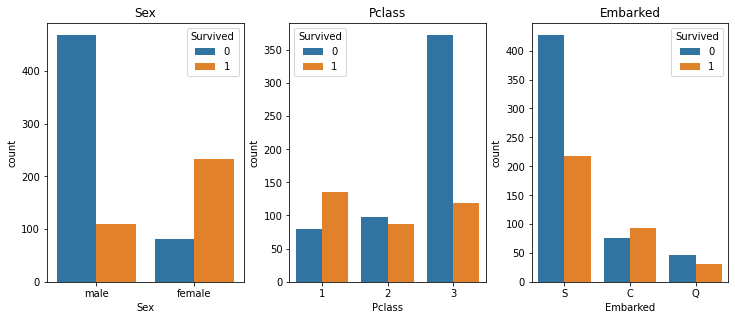

In [132]:
fig, ax = plt.subplots(1, 3, figsize=(10, 4))
plt.tight_layout(pad=0.4, w_pad=1.5, h_pad=5.0)

for index, col_name in enumerate(['Sex', 'Pclass', 'Embarked']):
    sns.countplot(x=df[col_name], hue=df['Survived'], ax=ax[index])
#     ax[index].set_xticks(ax[index].get_xticks(), ax[index].get_xticklabels(),
#                                      rotation=45)#, ha='right')
    ax[index].set_title(col_name)
    
plt.show()    

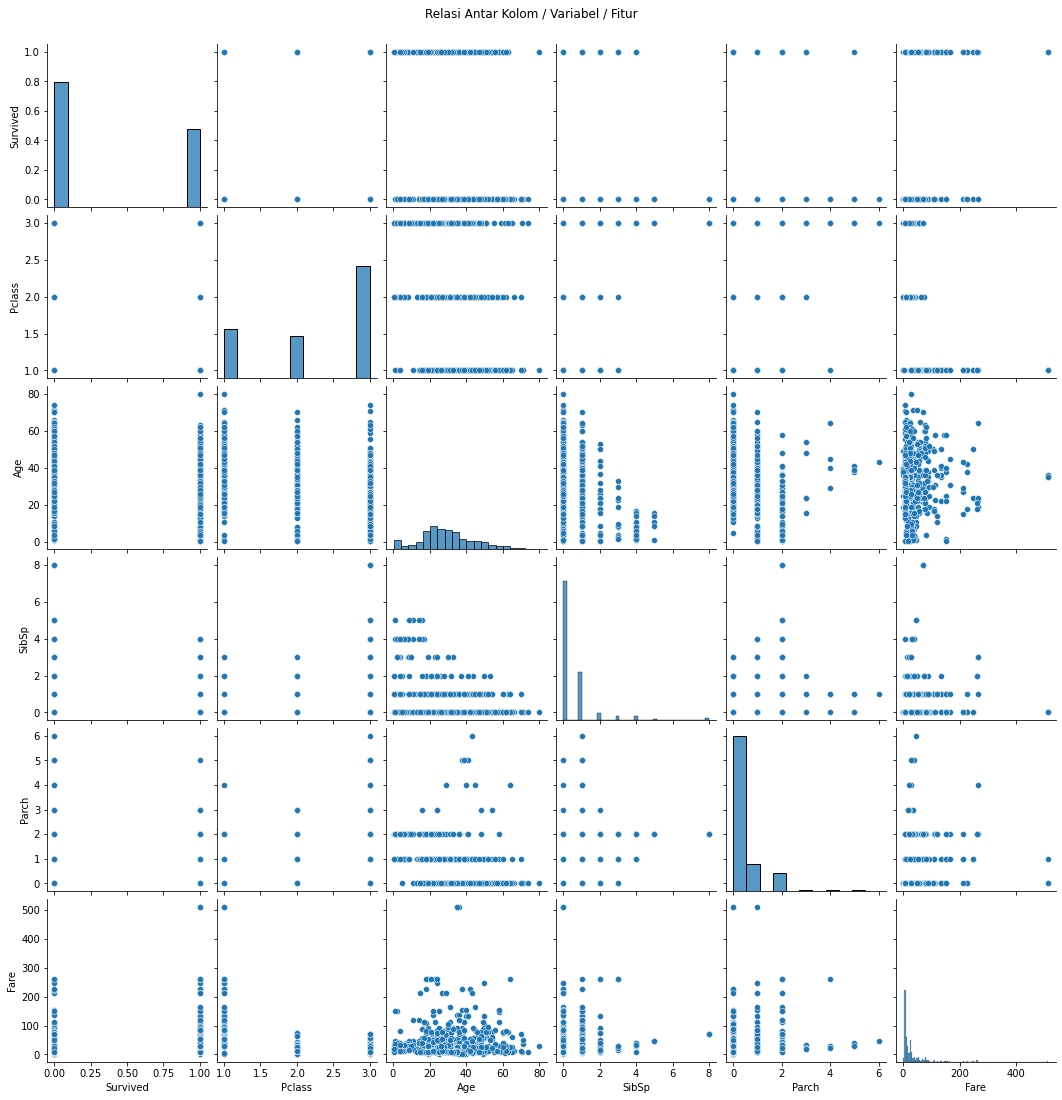

In [142]:
graph = sns.pairplot(df)
graph.fig.suptitle('Relasi Antar Kolom / Variabel / Fitur', y=1.02)

plt.show()

### Korelasi Antar Kolom

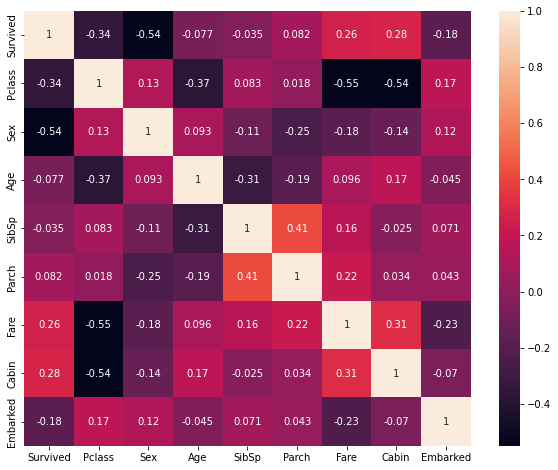

In [154]:
df_encoded = df.copy()
df_encoded['Sex'] = df_encoded['Sex'].astype('category').cat.codes
df_encoded['Cabin'] = df_encoded['Cabin'].astype('category').cat.codes
df_encoded['Embarked'] = df_encoded['Embarked'].astype('category').cat.codes

plt.figure(figsize=(10, 8))

sns.heatmap(df_encoded.corr(), annot=True)

plt.show()